In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge geocoder --yes

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

font = {'size'   : 14}
mpl.rc('font', **font)

# Use Folium to display the Maps for Visualisation
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium import plugins

In [245]:
# load crime data, grep  a particular borough
dfc=pd.read_csv("berlincrime2018.csv",index_col = 0)
sw_data = dfc[dfc['Borough'] == 'Charlottenburg-Wilmersdorf'].reset_index(drop=True)
sw_data.drop(sw_data.tail(1).index,inplace=True)
sw_n=sw_data['Neighborhood'].to_list()
sw_data.drop(columns=['Borough'], inplace=True)
sw_data.set_index('Neighborhood', inplace=True)
sw_data.head(20)

,Total records,Robbery,Street robbery,Total physical injury,Serious bodily harm,Coercion,Total theft,Bicycle theft,Burglary,Property damage,Drug offenses
Neighborhood,,,,,,,,,,,
Charlottenburg-Nord,2532,23,6,279,84,107,1030,123,51,232,185
Heerstrasse,1530,16,9,178,64,39,656,75,89,139,49
Westend,3915,25,16,318,83,119,2188,213,79,243,45
Schloß Charlottenburg,2441,18,10,282,62,87,1062,190,52,261,37
Mierendorffplatz,1976,7,3,158,35,75,847,126,27,121,50
Otto-Suhr-Allee,4664,38,20,445,105,151,2266,421,62,399,65
Neue Kantstraße,2996,33,19,252,58,78,1534,269,66,222,57
Kantstraße,4191,38,15,284,54,85,2457,274,75,217,56
Kurfürstendamm,8120,62,31,760,218,154,4351,264,46,387,173


In [180]:
sw_data.describe()

,Total records,Robbery,Street robbery,Total physical injury,Serious bodily harm,Coercion,Total theft,Bicycle theft,Burglary,Property damage,Drug offenses
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,2957.823529,22.823529,10.529412,232.058824,57.647059,77.647059,1448.529412,199.117647,54.882353,204.705882,57.117647
std,2040.883058,15.371383,8.024320,173.368636,50.323878,42.443994,1046.435564,127.899806,28.159995,112.038924,50.730763
min,105.000000,4.000000,1.000000,22.000000,3.000000,6.000000,32.000000,1.000000,0.000000,9.000000,0.000000
25%,1634.000000,12.000000,4.000000,130.000000,25.000000,39.000000,793.000000,123.000000,33.000000,108.000000,18.000000
50%,2441.000000,18.000000,9.000000,216.000000,58.000000,78.000000,1062.000000,179.000000,52.000000,222.000000,49.000000
75%,4094.000000,33.000000,15.000000,282.000000,64.000000,107.000000,2188.000000,269.000000,75.000000,259.000000,65.000000
max,8120.000000,62.000000,31.000000,760.000000,218.000000,154.000000,4351.000000,471.000000,107.000000,399.000000,185.000000


Text(0.0, 1.0, 'Count of Cases per Neighborhood')

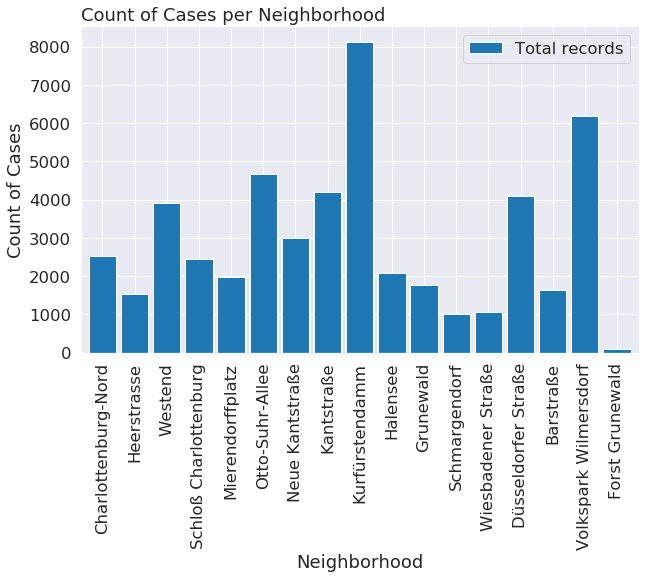

In [171]:
# display different statistics: crimes/rental costs/avarage school grade
#  for a particular borough Charlottenburg-Wilmersdorf, produce a bar chart
sw_data.plot(y = 'Total records', kind='bar', figsize=(10,6),
             width=0.85, colormap='tab20')

plt.xlabel('Neighborhood')
plt.ylabel('Count of Cases')
plt.title('Count of Cases per Neighborhood', loc='left', fontsize=18)

In [172]:
swt=sw_data.drop(columns=['Total records']).T
print(swt.shape)
swt.head(10)

(10, 17)


Neighborhood,Charlottenburg-Nord,Heerstrasse,Westend,Schloß Charlottenburg,Mierendorffplatz,Otto-Suhr-Allee,Neue Kantstraße,Kantstraße,Kurfürstendamm,Halensee,Grunewald,Schmargendorf,Wiesbadener Straße,Düsseldorfer Straße,Barstraße,Volkspark Wilmersdorf,Forst Grunewald
Robbery,23,16,25,18,7,38,33,38,62,13,12,4,10,40,15,27,7
Street robbery,6,9,16,10,3,20,19,15,31,4,5,1,3,15,5,13,4
Total physical injury,279,178,318,282,158,445,252,284,760,136,89,60,94,242,130,216,22
Serious bodily harm,84,64,83,62,35,105,58,54,218,26,18,10,16,58,25,61,3
Coercion,107,39,119,87,75,151,78,85,154,39,56,28,29,108,63,96,6
Total theft,1030,656,2188,1062,847,2266,1534,2457,4351,1130,793,567,579,2210,794,2129,32
Bicycle theft,123,75,213,190,126,421,269,274,264,123,96,54,179,337,169,471,1
Burglary,51,89,79,52,27,62,66,75,46,33,87,50,18,107,27,64,0
Property damage,232,139,243,261,121,399,222,217,387,108,235,91,96,363,98,259,9
Drug offenses,185,49,45,37,50,65,57,56,173,16,15,18,15,70,45,75,0


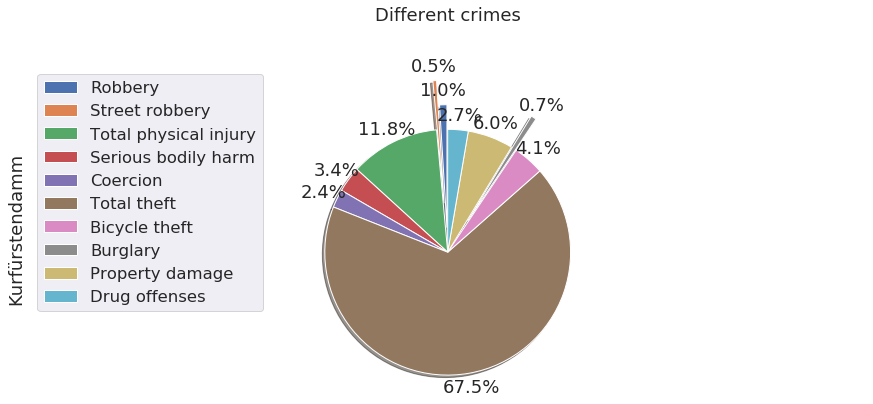

In [173]:
# pie diagramm for Kurfürstendamm
explode_list = [0.2,0.4,0,0,0,0,0,0.3,0,0] # ratio for each continent with which to offset each wedge.
swt['Kurfürstendamm'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list         # 'explode' lowest 3 continents
                            )
# scale the title up by 12% to match pctdistance
plt.title('Different crimes', y=1.12) 
plt.axis('equal') 
 # add legend
plt.legend(labels=swt.index, loc='upper left') 
# show plot
plt.show()

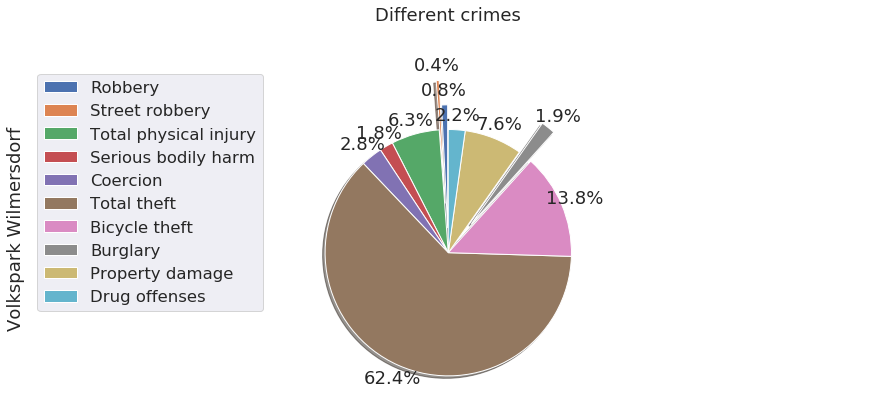

In [174]:
# pie diagramm Volkspark Wilmersdorf
explode_list = [0.2,0.4,0,0,0,0,0,0.3,0,0] # ratio for each continent with which to offset each wedge.
swt['Volkspark Wilmersdorf'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list         # 'explode' lowest 3 continents
                            )
# scale the title up by 12% to match pctdistance
plt.title('Different crimes', y=1.12) 
plt.axis('equal') 
 # add legend
plt.legend(labels=swt.index, loc='upper left') 
# show plot
plt.show()

In [175]:
files='berlincrime' + str(2012)+'.csv'
years=[]
df0=pd.read_csv("berlincrime2018.csv",index_col = 0)
df1 = df0[df0['Borough'] == 'Charlottenburg-Wilmersdorf'].reset_index(drop=True)
df1.drop(df1.tail(1).index,inplace=True)
l1= df1['Neighborhood'].to_list()
l2=df1['Total records'].to_list()
years.append(2012)
df2= pd.DataFrame(
    {'Neighborhood': l1,
     'Year 2012': l2
    })
df2.head(5)

,Neighborhood,Year 2012
0,Charlottenburg-Nord,2532
1,Heerstrasse,1530
2,Westend,3915
3,Schloß Charlottenburg,2441
4,Mierendorffplatz,1976


In [176]:
# load crime data, grep  a particular borough, create a data frame with a total records per year
for  year in range (2013,2019):
    files='berlincrime' + str(year)+'.csv'
    print(files)
    df0=pd.read_csv(files,index_col = 0)
    df1 = df0[df0['Borough'] == 'Charlottenburg-Wilmersdorf'].reset_index(drop=True)
    df1.drop(df1.tail(1).index,inplace=True)
    l2=df1['Total records'].to_list()
    cname='Year ' +str(year)
    years.append(year)
    df2[cname]=l2
#sw_data.drop(columns=['Borough'], inplace=True)
df2.set_index('Neighborhood', inplace=True)
df2.head(5)

berlincrime2013.csv
berlincrime2014.csv
berlincrime2015.csv
berlincrime2016.csv
berlincrime2017.csv
berlincrime2018.csv


,Year 2012,Year 2013,Year 2014,Year 2015,Year 2016,Year 2017,Year 2018
Neighborhood,,,,,,,
Charlottenburg-Nord,2532,2730,2913,2945,3169,2846,2532
Heerstrasse,1530,1425,1448,2099,1474,1352,1530
Westend,3915,3977,4659,4777,4843,4448,3915
Schloß Charlottenburg,2441,2435,2537,2680,2500,2463,2441
Mierendorffplatz,1976,1874,2145,2113,2041,2145,1976


In [177]:
#df2T.describe()
totl=df2.loc['Kurfürstendamm'] # Pandas series
df_tot =pd.DataFrame(
    {'year': years,
     'total': totl.to_list()
    })

# view the final dataframe
df_tot.head()

,year,total
0,2012,8120
1,2013,8737
2,2014,9932
3,2015,10174
4,2016,8561


Text(0.5, 1.0, 'Total crime records for Kurfürstendamm from 2012 - 2018')

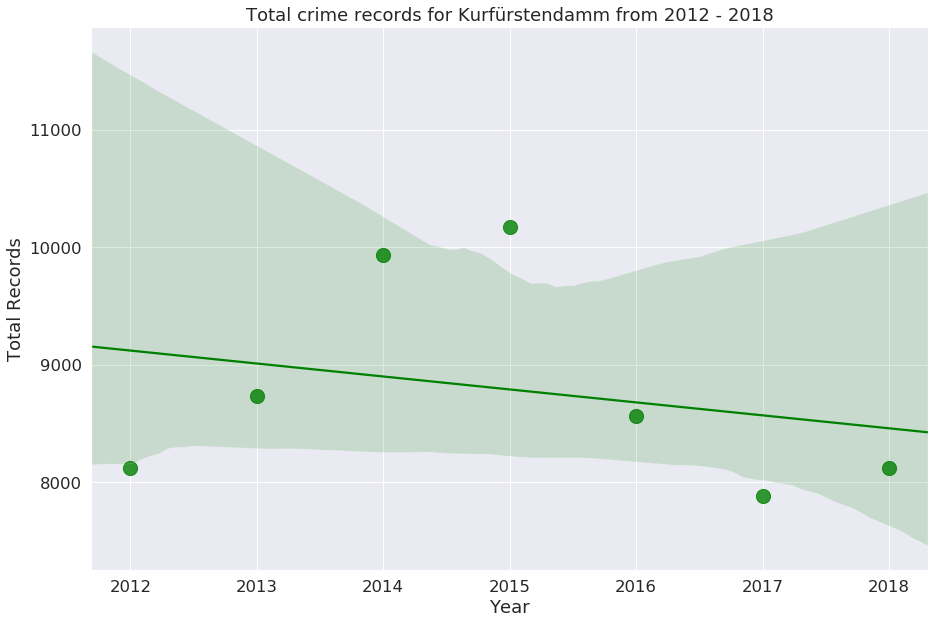

In [178]:
import seaborn as sns
# simple regression plot
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
#sns.set_style('ticks') # change background to white background
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Records')
ax.set_title('Total crime records for Kurfürstendamm from 2012 - 2018')

Text(0.5, 1.0, 'Total crime records for Kurfürstendamm from 2012 - 2018')

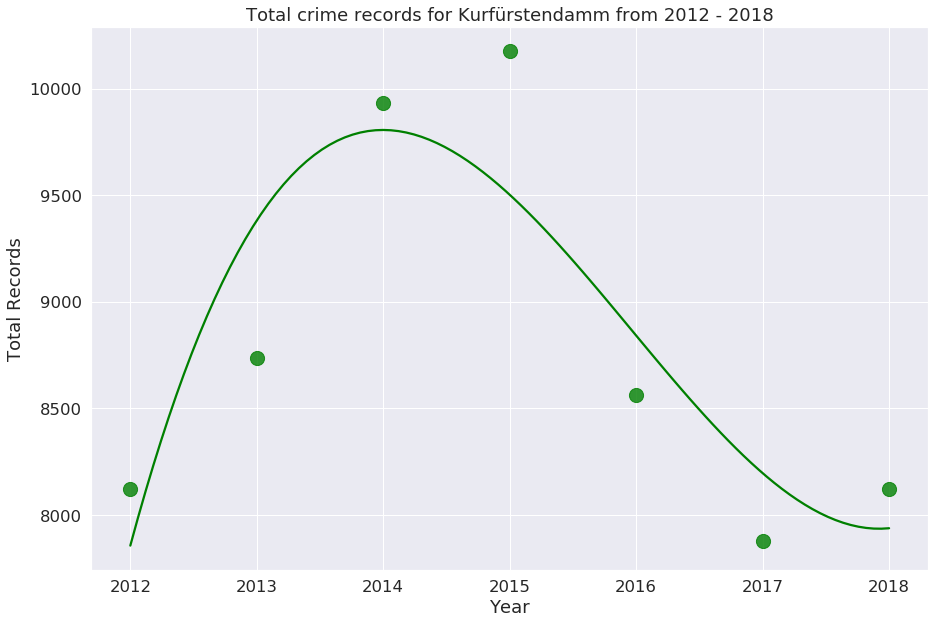

In [179]:
# polinomial fit of the thierd order 
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
ax = sns.regplot(x='year', y='total', data=df_tot, color='green',  scatter_kws={'s': 200}, \
                 order=3, ci=None, truncate=True)
ax.set(xlabel='Year', ylabel='Total Records')
ax.set_title('Total crime records for Kurfürstendamm from 2012 - 2018')

In [246]:
from folium.plugins import HeatMap
cw_long=[13.296100,13.262060,13.259810,13.296390,13.304730,13.310560,13.283700,13.314350,13.318910,13.295690,\
         13.265800,13.290050,13.309510,13.316530,13.314760,13.325950,13.265800]
cw_lati=[52.530450,52.505060,52.516200,52.515160,52.525690,52.516230,52.506410,52.506210,52.501630,52.495970,\
         52.483380,52.475800,52.472370,52.496440,52.485470,52.482790,52.483380]
cw_crim=df2['Year 2018'].to_list()
# take a cw borough
print(len(cw_long), df2.shape)
df_crime=pd.DataFrame(
    {'X': cw_lati,
     'Y': cw_long,
     'Records': cw_crim,
     'Name': sw_n
    })
df_crime.head()

17 (17, 7)


,X,Y,Records,Name
0,52.53045,13.29610,2532,Charlottenburg-Nord
1,52.50506,13.26206,1530,Heerstrasse
2,52.51620,13.25981,3915,Westend
3,52.51516,13.29639,2441,Schloß Charlottenburg
4,52.52569,13.30473,1976,Mierendorffplatz


In [241]:
data=[]
for i in range(len(cw_lati)):
    data.append([cw_lati[i],cw_long[i],cw_crim[i]/np.max(cw_crim)])
data[1]

[52.50506, 13.26206, 0.18842364532019704]

In [227]:
def generateBaseMap(default_location=[52.500000,13.283333], default_zoom_start=12):
    base_map = folium.Map(location=default_location,  zoom_start=default_zoom_start)
    return base_map

In [244]:
#from folium import plugins
from folium.plugins import HeatMap

base_map = generateBaseMap()
HeatMap(data).add_to(base_map)

#base_map.add_child(folium.ClickForMarker(popup='Potential Location'))
# display map
base_map

In [251]:
latmean=52.500000
lonmean=13.283333
  
# Creating a map object using Map() function. 
# Location parameter takes latitudes and  
map5 = folium.Map(location=[latmean,lonmean], 
        zoom_start=12) 
          
# Function to change the marker color  
# according to the elevation of volcano 
def color(elev): 
    if elev in range(0,2000): 
        col = 'green'
    elif elev in range(2001,3999): 
        col = 'blue'
    elif elev in range(4000,5999): 
        col = 'orange'
    else: 
        col='red'
    return col 
      
# Iterating over the LAT,LON,NAME and 
# ELEV columns simultaneously using zip()
for lat,lan,name,elev in zip(df_crime['X'],df_crime['Y'],df_crime['Name'],df_crime['Records']): 
    # Marker() takes location coordinates  
    # as a list as an argument 
    folium.Marker(location=[lat,lan],popup = name, 
                  icon= folium.Icon(color=color(elev), 
                  icon_color='yellow',icon = 'cloud')).add_to(map5) 
map5